<a href="https://colab.research.google.com/github/QuantumAlg0rithm/High-school/blob/main/%EA%B3%B5%EC%9C%A0%EC%BA%A0%ED%8D%BC%EC%8A%A4_1%ED%95%99%EA%B8%B0_%EC%88%98%ED%96%89%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 코로나19 확진자가 많은 곳은 인구밀도가 높을까?

인공지능기초



In [ ]:
# 한글 설치
import matplotlib.font_manager as fm
!apt-get install fonts-nanum
fm._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
# 그래프에 한글 나오게 설정

import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm 
fontpath='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name=fm.FontProperties(fname=fontpath).get_name()
plt.rc('font',family=font_name) 
plt.rc('axes', unicode_minus=False)

In [ ]:
import pandas as pd
인구1 = pd.read_csv('/content/drive/MyDrive/공유캠퍼스_인공지능_수행평가/202205_202205_연령별인구현황_월간.csv', encoding='cp949', thousands=',')
지역면적1 = pd.read_csv('/content/drive/MyDrive/공유캠퍼스_인공지능_수행평가/지역별_면적_20220604154038.csv', encoding='cp949', thousands=',')
코로나1 = pd.read_excel('/content/drive/MyDrive/공유캠퍼스_인공지능_수행평가/코로나19_시도별 발생동향.xlsx', thousands=',')


# 인구

In [ ]:
인구1 = 인구1[인구1['2022년05월_계_총인구수'] != 0]
인구1

,행정구역,2022년05월_계_총인구수,2022년05월_계_연령구간인구수,2022년05월_계_0~9세,2022년05월_계_10~19세,2022년05월_계_20~29세,2022년05월_계_30~39세,2022년05월_계_40~49세,2022년05월_계_50~59세,2022년05월_계_60~69세,2022년05월_계_70~79세,2022년05월_계_80~89세,2022년05월_계_90~99세,2022년05월_계_100세 이상
0,서울특별시 (1100000000),9496887,9496887,567846,753608,1414109,1431377,1471932,1507508,1290016,708167,308073,42528,1723
1,서울특별시 종로구 (1111000000),143850,143850,6726,10234,22718,19379,20580,24814,20387,11650,6362,960,40
2,서울특별시 중구 (1114000000),122054,122054,6091,6500,18003,19862,17229,19939,18009,10336,5207,844,34
3,서울특별시 용산구 (1117000000),222083,222083,12380,14559,32347,37680,33400,36024,29389,15969,8802,1457,76
4,서울특별시 성동구 (1120000000),284173,284173,18785,18940,42757,46229,42904,45723,38015,20216,9373,1179,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,경상남도 거창군 (4888000000),60689,60689,3370,5781,5560,4579,7337,10226,10972,6930,5116,793,25
289,경상남도 합천군 (4889000000),42560,42560,1380,2259,2665,2270,3881,7150,9654,7002,5526,755,18
290,제주특별자치도 (5000000000),677766,677766,56769,70458,79445,80207,111658,116482,86227,46361,25561,4390,208
291,제주특별자치도 제주시 (5011000000),493275,493275,42710,52781,61128,60948,82000,83799,59351,30847,16575,3004,132


In [ ]:
def Addr1(x) :
  return x.split()[0]
인구2 = 인구1.copy()
인구2['시도'] = 인구2['행정구역'].apply(Addr1)
인구2.head()

,행정구역,2022년05월_계_총인구수,2022년05월_계_연령구간인구수,2022년05월_계_0~9세,2022년05월_계_10~19세,2022년05월_계_20~29세,2022년05월_계_30~39세,2022년05월_계_40~49세,2022년05월_계_50~59세,2022년05월_계_60~69세,2022년05월_계_70~79세,2022년05월_계_80~89세,2022년05월_계_90~99세,2022년05월_계_100세 이상,시도
0,서울특별시 (1100000000),9496887,9496887,567846,753608,1414109,1431377,1471932,1507508,1290016,708167,308073,42528,1723,서울특별시
1,서울특별시 종로구 (1111000000),143850,143850,6726,10234,22718,19379,20580,24814,20387,11650,6362,960,40,서울특별시
2,서울특별시 중구 (1114000000),122054,122054,6091,6500,18003,19862,17229,19939,18009,10336,5207,844,34,서울특별시
3,서울특별시 용산구 (1117000000),222083,222083,12380,14559,32347,37680,33400,36024,29389,15969,8802,1457,76,서울특별시
4,서울특별시 성동구 (1120000000),284173,284173,18785,18940,42757,46229,42904,45723,38015,20216,9373,1179,52,서울특별시


In [ ]:
def Addr2(x) :
  a = x.split()
  if len(a) > 2 :
    return a[1]
  else :
    return ''
인구2['시군구1'] = 인구2['행정구역'].apply(Addr2)
인구2.head(2)

,행정구역,2022년05월_계_총인구수,2022년05월_계_연령구간인구수,2022년05월_계_0~9세,2022년05월_계_10~19세,2022년05월_계_20~29세,2022년05월_계_30~39세,2022년05월_계_40~49세,2022년05월_계_50~59세,2022년05월_계_60~69세,2022년05월_계_70~79세,2022년05월_계_80~89세,2022년05월_계_90~99세,2022년05월_계_100세 이상,시도,시군구1
0,서울특별시 (1100000000),9496887,9496887,567846,753608,1414109,1431377,1471932,1507508,1290016,708167,308073,42528,1723,서울특별시,
1,서울특별시 종로구 (1111000000),143850,143850,6726,10234,22718,19379,20580,24814,20387,11650,6362,960,40,서울특별시,종로구


In [ ]:
def Addr3(x) :
  a = x.split()
  if len(a) > 3 :
    return a[2]
  else :
    return ''
인구2['시군구2'] = 인구2['행정구역'].apply(Addr3)
인구2.head()

,행정구역,2022년05월_계_총인구수,2022년05월_계_연령구간인구수,2022년05월_계_0~9세,2022년05월_계_10~19세,2022년05월_계_20~29세,2022년05월_계_30~39세,2022년05월_계_40~49세,2022년05월_계_50~59세,2022년05월_계_60~69세,2022년05월_계_70~79세,2022년05월_계_80~89세,2022년05월_계_90~99세,2022년05월_계_100세 이상,시도,시군구1,시군구2
0,서울특별시 (1100000000),9496887,9496887,567846,753608,1414109,1431377,1471932,1507508,1290016,708167,308073,42528,1723,서울특별시,,
1,서울특별시 종로구 (1111000000),143850,143850,6726,10234,22718,19379,20580,24814,20387,11650,6362,960,40,서울특별시,종로구,
2,서울특별시 중구 (1114000000),122054,122054,6091,6500,18003,19862,17229,19939,18009,10336,5207,844,34,서울특별시,중구,
3,서울특별시 용산구 (1117000000),222083,222083,12380,14559,32347,37680,33400,36024,29389,15969,8802,1457,76,서울특별시,용산구,
4,서울특별시 성동구 (1120000000),284173,284173,18785,18940,42757,46229,42904,45723,38015,20216,9373,1179,52,서울특별시,성동구,


In [ ]:
def Addr4(x) :
  return x.split('(')[1][:-1]
인구2['행정코드'] = 인구2['행정구역'].apply(Addr4)
인구2.head()

,행정구역,2022년05월_계_총인구수,2022년05월_계_연령구간인구수,2022년05월_계_0~9세,2022년05월_계_10~19세,2022년05월_계_20~29세,2022년05월_계_30~39세,2022년05월_계_40~49세,2022년05월_계_50~59세,2022년05월_계_60~69세,2022년05월_계_70~79세,2022년05월_계_80~89세,2022년05월_계_90~99세,2022년05월_계_100세 이상,시도,시군구1,시군구2,행정코드
0,서울특별시 (1100000000),9496887,9496887,567846,753608,1414109,1431377,1471932,1507508,1290016,708167,308073,42528,1723,서울특별시,,,1100000000
1,서울특별시 종로구 (1111000000),143850,143850,6726,10234,22718,19379,20580,24814,20387,11650,6362,960,40,서울특별시,종로구,,1111000000
2,서울특별시 중구 (1114000000),122054,122054,6091,6500,18003,19862,17229,19939,18009,10336,5207,844,34,서울특별시,중구,,1114000000
3,서울특별시 용산구 (1117000000),222083,222083,12380,14559,32347,37680,33400,36024,29389,15969,8802,1457,76,서울특별시,용산구,,1117000000
4,서울특별시 성동구 (1120000000),284173,284173,18785,18940,42757,46229,42904,45723,38015,20216,9373,1179,52,서울특별시,성동구,,1120000000


In [ ]:
인구3 = 인구2[(인구2['시군구1']=='')].loc[:,['시도', '2022년05월_계_총인구수']]

인구3

,시도,2022년05월_계_총인구수
0,서울특별시,9496887
26,부산광역시,3338167
43,대구광역시,2376676
52,인천광역시,2955167
66,광주광역시,1436012
72,대전광역시,1448933
78,울산광역시,1116482
84,세종특별자치시,379340
85,세종특별자치시,379340
86,경기도,13581496


In [ ]:
인구4 = 인구3.drop_duplicates() # 중복행 삭제
인구4

,시도,2022년05월_계_총인구수
0,서울특별시,9496887
26,부산광역시,3338167
43,대구광역시,2376676
52,인천광역시,2955167
66,광주광역시,1436012
72,대전광역시,1448933
78,울산광역시,1116482
84,세종특별자치시,379340
86,경기도,13581496
141,강원도,1539005


In [ ]:
인구4.rename(columns = {'2022년05월_계_총인구수':'인구수'},inplace=True)
인구4.rename(columns = {'시도':'지역'},inplace=True)

인구4

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,지역,인구수
0,서울특별시,9496887
26,부산광역시,3338167
43,대구광역시,2376676
52,인천광역시,2955167
66,광주광역시,1436012
72,대전광역시,1448933
78,울산광역시,1116482
84,세종특별자치시,379340
86,경기도,13581496
141,강원도,1539005


In [ ]:
인구4.rename(columns = {'인구수':'인구수 (명)'},inplace=True)
인구4

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,지역,인구수 (명)
0,서울특별시,9496887
26,부산광역시,3338167
43,대구광역시,2376676
52,인천광역시,2955167
66,광주광역시,1436012
72,대전광역시,1448933
78,울산광역시,1116482
84,세종특별자치시,379340
86,경기도,13581496
141,강원도,1539005


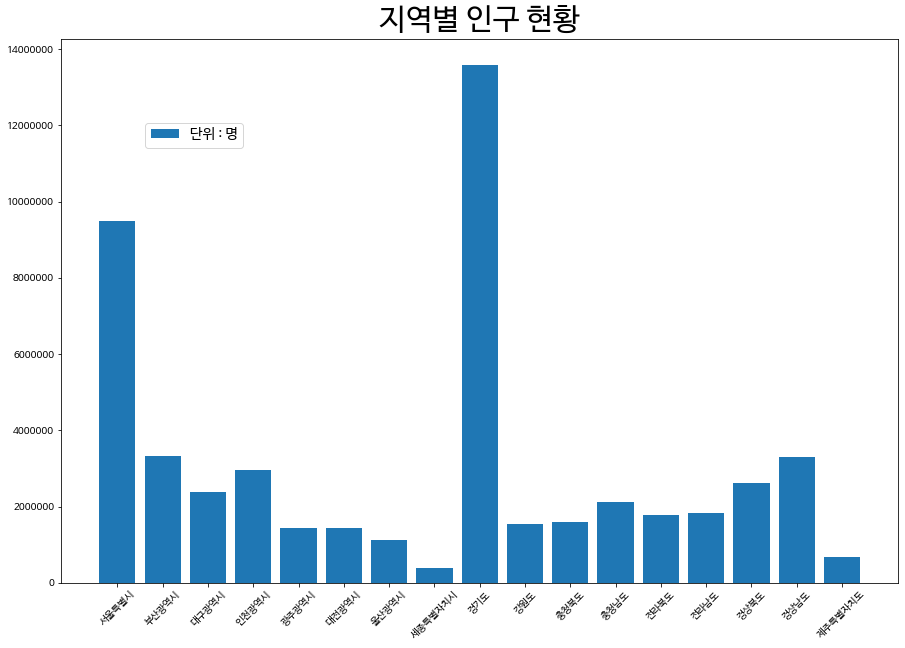

In [ ]:
plt.figure(figsize=(15,10))

plt.bar(인구4['지역'],인구4['인구수 (명)'], label='단위 : 명')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.title('지역별 인구 현황',fontsize=30)
plt.xticks(rotation =45)
plt.legend(loc=(0.1, 0.8),fontsize=14)

plt.show()



# 지역면적

In [ ]:
지역면적1.rename(columns = {'남북한별 ':'지역'},inplace=True)
지역면적1

,지역,면적 (㎢)
0,서울특별시,605
1,부산광역시,770
2,대구광역시,883
3,인천광역시,1065
4,광주광역시,501
5,대전광역시,540
6,울산광역시,1062
7,세종특별자치시,465
8,경기도,10195
9,강원도,16830


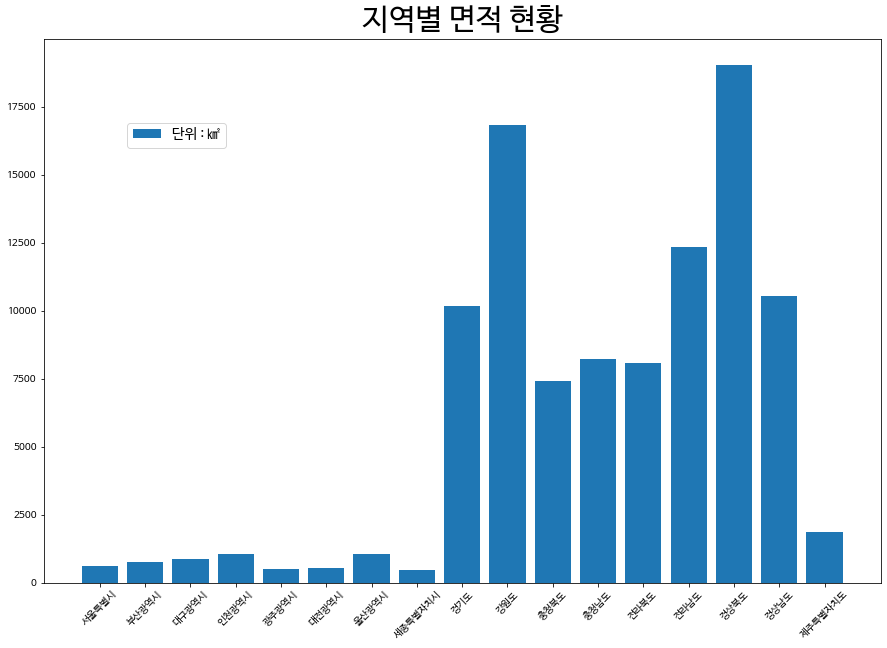

In [ ]:
plt.figure(figsize=(15,10))

plt.bar(지역면적1['지역'],지역면적1['면적 (㎢)'],label='단위 : ㎢')


plt.title('지역별 면적 현황',fontsize=30)
plt.xticks(rotation =45)
plt.legend(loc=(0.1, 0.8),fontsize=14)

plt.show()

# 인구밀도

In [ ]:
인구밀도 = 인구4.merge(지역면적1,left_on='지역',right_on='지역',how='left')
인구밀도

,지역,인구수 (명),면적 (㎢)
0,서울특별시,9496887,605
1,부산광역시,3338167,770
2,대구광역시,2376676,883
3,인천광역시,2955167,1065
4,광주광역시,1436012,501
5,대전광역시,1448933,540
6,울산광역시,1116482,1062
7,세종특별자치시,379340,465
8,경기도,13581496,10195
9,강원도,1539005,16830


In [ ]:
인구밀도['인구밀도 (명/㎢)'] = 인구밀도['인구수 (명)'] / 인구밀도['면적 (㎢)']
인구밀도

,지역,인구수 (명),면적 (㎢),인구밀도 (명/㎢)
0,서울특별시,9496887,605,15697.333884
1,부산광역시,3338167,770,4335.281818
2,대구광역시,2376676,883,2691.592299
3,인천광역시,2955167,1065,2774.804695
4,광주광역시,1436012,501,2866.291417
5,대전광역시,1448933,540,2683.209259
6,울산광역시,1116482,1062,1051.301318
7,세종특별자치시,379340,465,815.784946
8,경기도,13581496,10195,1332.172241
9,강원도,1539005,16830,91.444147


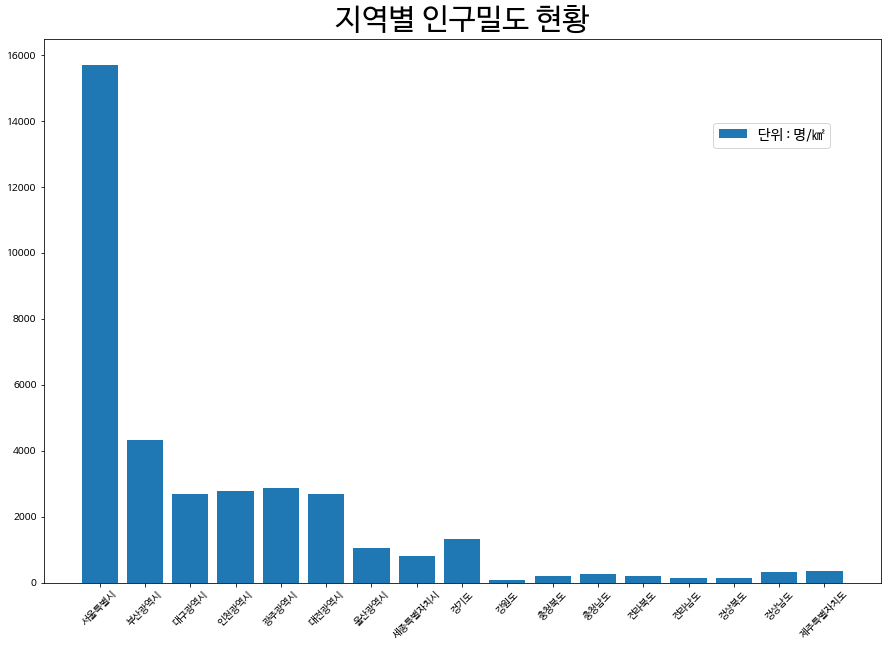

In [ ]:
plt.figure(figsize=(15,10))

plt.bar(인구밀도['지역'],인구밀도['인구밀도 (명/㎢)'],label='단위 : 명/㎢')


plt.title('지역별 인구밀도 현황',fontsize=30)
plt.xticks(rotation =45)
plt.legend(loc=(0.8, 0.8),fontsize=14)

plt.show()


# 코로나

In [ ]:
코로나1

,지역,확진환자,사망자,발생률
0,합계,18153851,24238,35155
1,서울,3626136,4835,38132
2,부산,1094773,2135,32676
3,대구,761278,1331,31914
4,인천,1074002,1393,36427
5,광주,532913,557,36966
6,대전,511531,696,35223
7,울산,379019,340,33793
8,세종,138830,35,37330
9,경기,4935892,6229,36386


In [ ]:
코로나2 = 코로나1.loc[1:17,:]
코로나2

,지역,확진환자,사망자,발생률
1,서울,3626136,4835,38132
2,부산,1094773,2135,32676
3,대구,761278,1331,31914
4,인천,1074002,1393,36427
5,광주,532913,557,36966
6,대전,511531,696,35223
7,울산,379019,340,33793
8,세종,138830,35,37330
9,경기,4935892,6229,36386
10,강원,516847,853,33594


In [ ]:
시도약칭 = pd.read_csv('/content/drive/MyDrive/공유캠퍼스_인공지능_수행평가/시도명칭.csv',encoding='cp949')
시도약칭

,시도약칭,시도정식명칭
0,서울,서울특별시
1,부산,부산광역시
2,대구,대구광역시
3,인천,인천광역시
4,광주,광주광역시
5,대전,대전광역시
6,울산,울산광역시
7,세종,세종특별자치시
8,경기,경기도
9,강원,강원도


In [ ]:
코로나3 = 코로나2.merge(시도약칭, left_on='지역',right_on='시도약칭')
코로나3

,지역,확진환자,사망자,발생률,시도약칭,시도정식명칭
0,서울,3626136,4835,38132,서울,서울특별시
1,부산,1094773,2135,32676,부산,부산광역시
2,대구,761278,1331,31914,대구,대구광역시
3,인천,1074002,1393,36427,인천,인천광역시
4,광주,532913,557,36966,광주,광주광역시
5,대전,511531,696,35223,대전,대전광역시
6,울산,379019,340,33793,울산,울산광역시
7,세종,138830,35,37330,세종,세종특별자치시
8,경기,4935892,6229,36386,경기,경기도
9,강원,516847,853,33594,강원,강원도


In [ ]:
코로나4 = 코로나3.loc[:,['시도정식명칭','확진환자']]
코로나4

,시도정식명칭,확진환자
0,서울특별시,3626136
1,부산광역시,1094773
2,대구광역시,761278
3,인천광역시,1074002
4,광주광역시,532913
5,대전광역시,511531
6,울산광역시,379019
7,세종특별자치시,138830
8,경기도,4935892
9,강원도,516847


In [ ]:
코로나4.rename(columns = {'시도정식명칭':'지역'},inplace=True)
코로나4

,지역,확진환자
0,서울특별시,3626136
1,부산광역시,1094773
2,대구광역시,761278
3,인천광역시,1074002
4,광주광역시,532913
5,대전광역시,511531
6,울산광역시,379019
7,세종특별자치시,138830
8,경기도,4935892
9,강원도,516847


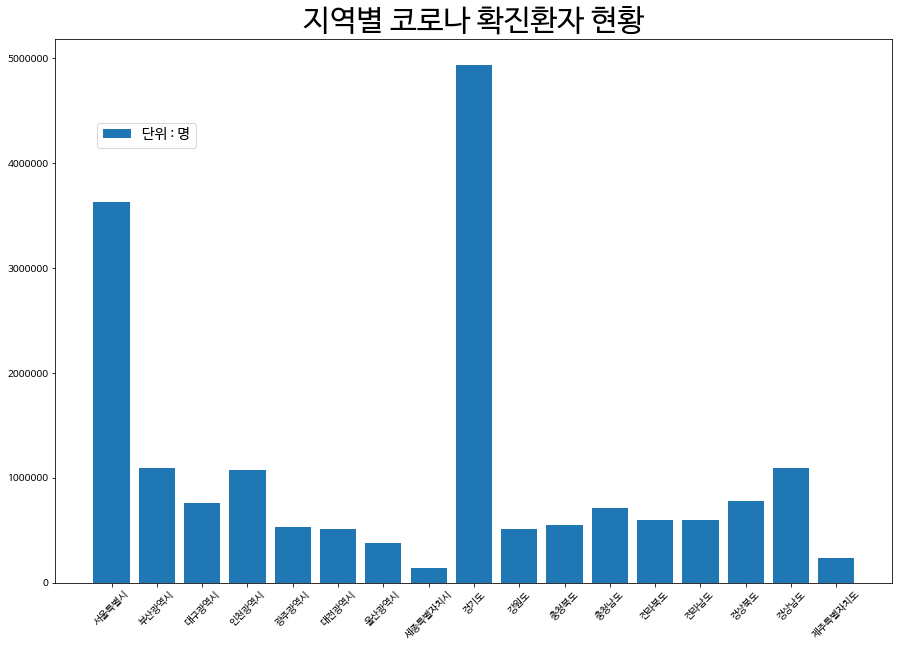

In [ ]:
plt.figure(figsize=(15,10))

plt.bar(코로나4['지역'],코로나4['확진환자'], label='단위 : 명')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.title('지역별 코로나 확진환자 현황',fontsize=30)
plt.xticks(rotation =45)
plt.legend(loc=(0.05, 0.8),fontsize=14)

plt.show()

# 상관관계

In [ ]:
인구밀도와코로나19 = 인구밀도.merge(코로나4, left_on='지역',right_on='지역',how='left')
인구밀도와코로나19

,지역,인구수 (명),면적 (㎢),인구밀도 (명/㎢),확진환자
0,서울특별시,9496887,605,15697.333884,3626136
1,부산광역시,3338167,770,4335.281818,1094773
2,대구광역시,2376676,883,2691.592299,761278
3,인천광역시,2955167,1065,2774.804695,1074002
4,광주광역시,1436012,501,2866.291417,532913
5,대전광역시,1448933,540,2683.209259,511531
6,울산광역시,1116482,1062,1051.301318,379019
7,세종특별자치시,379340,465,815.784946,138830
8,경기도,13581496,10195,1332.172241,4935892
9,강원도,1539005,16830,91.444147,516847


In [ ]:
인구밀도와코로나19 = 인구밀도와코로나19.loc[:,['지역','인구밀도 (명/㎢)','확진환자']]
인구밀도와코로나19

,지역,인구밀도 (명/㎢),확진환자
0,서울특별시,15697.333884,3626136
1,부산광역시,4335.281818,1094773
2,대구광역시,2691.592299,761278
3,인천광역시,2774.804695,1074002
4,광주광역시,2866.291417,532913
5,대전광역시,2683.209259,511531
6,울산광역시,1051.301318,379019
7,세종특별자치시,815.784946,138830
8,경기도,1332.172241,4935892
9,강원도,91.444147,516847


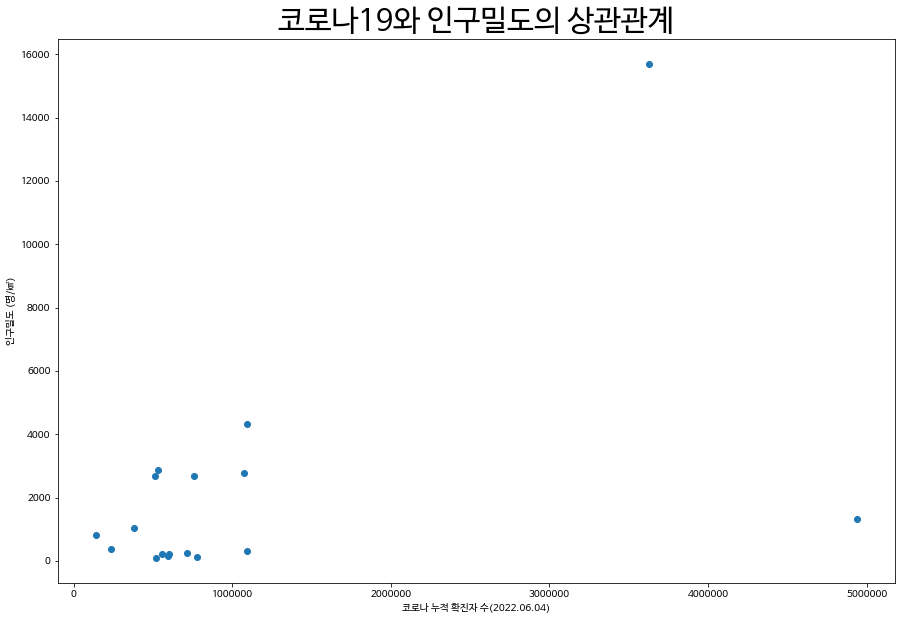

In [ ]:
plt.figure(figsize=(15,10))
plt.title('코로나19와 인구밀도의 상관관계',fontsize=30)
plt.scatter(인구밀도와코로나19['확진환자'],인구밀도와코로나19['인구밀도 (명/㎢)'])
plt.xlabel('코로나 누적 확진자 수(2022.06.04)')
plt.ylabel('인구밀도 (명/㎢)')

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

In [ ]:
인구밀도와코로나19.corr()

,인구밀도 (명/㎢),확진환자
인구밀도 (명/㎢),1.000000,0.522311
확진환자,0.522311,1.000000


# 이상치제거

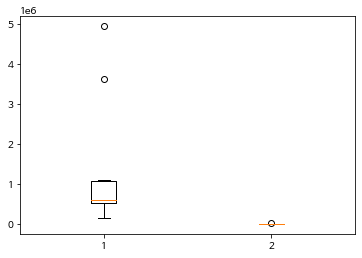

In [ ]:
plt.boxplot([인구밀도와코로나19['확진환자'],인구밀도와코로나19['인구밀도 (명/㎢)']])
plt.show()

In [ ]:
def Out(x) :
  q1 = x.quantile(0.25)
  q3 = x.quantile(0.75)
  IQR = q3 - q1
  return (x > (q1 - 1.5 * IQR)) & (x < (q3 + 1.5 * IQR))

In [ ]:
최종 = 인구밀도와코로나19[Out(인구밀도와코로나19['확진환자']) & Out(인구밀도와코로나19['확진환자'])]
최종

,지역,인구밀도 (명/㎢),확진환자
1,부산광역시,4335.281818,1094773
2,대구광역시,2691.592299,761278
3,인천광역시,2774.804695,1074002
4,광주광역시,2866.291417,532913
5,대전광역시,2683.209259,511531
6,울산광역시,1051.301318,379019
7,세종특별자치시,815.784946,138830
9,강원도,91.444147,516847
10,충청북도,215.611314,555058
11,충청남도,257.053238,714865


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
x = np.array(최종['확진환자']).reshape(-1,1)
y = np.array(최종['인구밀도 (명/㎢)']).reshape(-1,1)
model = LinearRegression().fit(x,y)
b0 = model.intercept_[0]
b1 = model.coef_[0][0]

print('절편(b0) : ',b0)
print('기울기(b1) : ',b1)
print('선형회귀식 : y = {0} x + {1}'.format(b1,b0))

절편(b0) :  80.76270826675909
기울기(b1) :  0.0018533306438131738
선형회귀식 : y = 0.0018533306438131738 x + 80.76270826675909


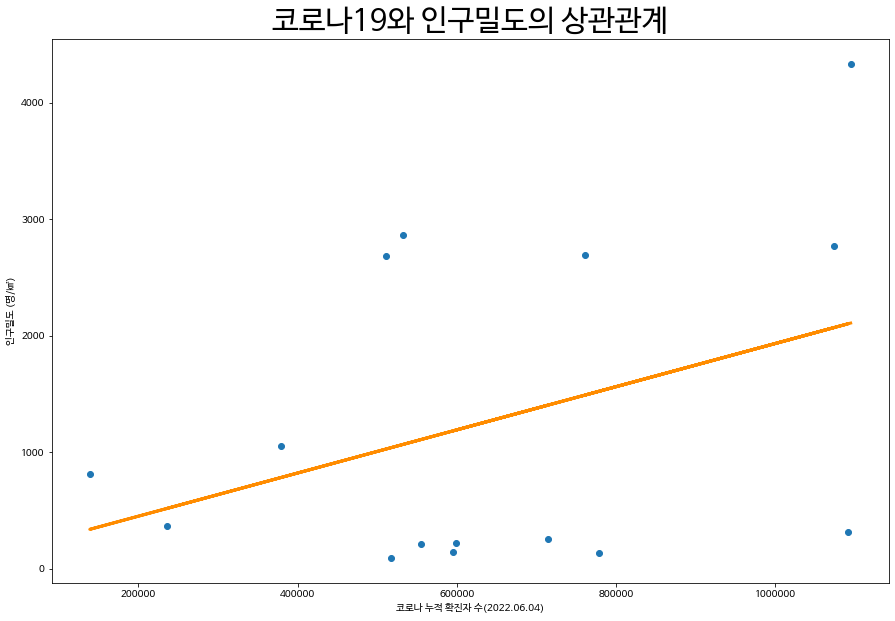

In [ ]:
plt.figure(figsize=(15,10))
plt.title('코로나19와 인구밀도의 상관관계',fontsize=30)
plt.scatter(최종['확진환자'],최종['인구밀도 (명/㎢)'])
plt.xlabel('코로나 누적 확진자 수(2022.06.04)')
plt.ylabel('인구밀도 (명/㎢)')

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])

# 선형회귀식
plt.plot(x,b0 + b1*x,'r',c = 'darkorange', linewidth = 3)

plt.show()

In [ ]:
최종.corr()

,인구밀도 (명/㎢),확진환자
인구밀도 (명/㎢),1.000000,0.383973
확진환자,0.383973,1.000000


# 해석

이상치를 제거한 상관관계가 0.383973, 약 0.4로 약간의 양의 상관관계가 있다고 볼 수 있다. 이상치를 제거하지 않은 경우 0.5 정도의 상관관계를 가지고 있다. 
나는 적어도 0.7에서 0.8 정도의 상관관계를 가질 것이라고 생각했는데 결과와는 좀 달랐다. 
이러한 결과로 두 가지를 알 수 있다.

첫째, 우리나라가 상대적으로 좁고, 다른 도시로 이동하는 경우가 많기 때문이다. 서울에서 바닷가등으로 여행도 다니고, 경기도나 서울 주변 도시에서 서울로 출퇴근하는 경우도 많이 때문이다. 이는 미국과 같은 넓은 나라를 대상으로 분석하면 꽤 높은 상관관계를 얻을 수 있을 것 같다. 

둘째, 앞에 내용과 더불어 코로나19가 발생한 지 2년이 넘는 시간이 지났기 때문에 그 사이 동안 다른 도시로 이동을 많이 했기 때문에 시간이 지날수록 상관관계가 점점 낮아질 것 같다.